In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action='ignore',category=np.VisibleDeprecationWarning)

# Lecture 10

In this lecture, we will:
1. Introduce python Lists
2. Show how to build tables from rows instead of columns
3. finish our discussion on grouping
4. Introduce pivots -- a special kind of grouping
5. Introduce joins

---

## Lists

Lists in python are like arrays but they can contain things of different types and you make them by using square brackets:

In [2]:
[1, 5, 'hello', 5.0]

[1, 5, 'hello', 5.0]

In [3]:
another_list = [1, 5, 'hello', 5.0, make_array(1,2,3)]
another_list

[1, 5, 'hello', 5.0, array([1, 2, 3])]

You have to use square brakets when accessing elements from a list (you can't use item).

In [4]:
a = make_array(1,2,3)
a.item(0) # .item() is specific to an array data type

1

In [5]:
#another_list.item(0) # we can't use.item with a list data type
another_list[2] # to access an individual element in a list, we use square brackets instead

'hello'

Recall that for arrays you could do either. (In the real world, most people would probably use square brackets).

In [6]:
my_array = make_array("Apple", "Banana", "Corn")
my_array[1]

'Banana'

Same thing as:

In [7]:
my_array.item(1)

'Banana'

### Rows from lists

We need lists to be able to add a row to our table.  Why?

Here we make a table with a column (we have been doing this all semester).

In [8]:
Table().with_columns('Numbers', [1, 2, 3])
# we are adding a new column, with a list
# python converts the list to an array
# and then adds that array as a new column
# no error! yay!

Numbers
1
2
3


Here we make an empty table with just column labels. (This is new!)

In [9]:
drinks = Table(['Drink', 'Cafe', 'Price'])
drinks

Drink,Cafe,Price


Here we add rows to our table.  Each row is a `List` of elements -- one for each column.

In [10]:
drinks = drinks.with_rows([
    ['Milk Tea', 'Asha', 5.5],
    ['Espresso', 'Strada',  1.75],
    ['Latte',    'Strada',  3.25],
    ['Espresso', "FSM",   2]
])
drinks

Drink,Cafe,Price
Milk Tea,Asha,5.5
Espresso,Strada,1.75
Latte,Strada,3.25
Espresso,FSM,2


---

<center> Return to Slides </center>

---

## Grouping

For this part of the notebook we will use the following toy data:

In [11]:
drinks.group('Drink')
# grouped by the unique elements in the Drink column
# 2 espressos
# 1 latte
# 1 milk tea

Drink,count
Espresso,2
Latte,1
Milk Tea,1


In [12]:
drinks.group('Cafe')
# Strada has 2 drinks in this table
# Asha and FSM each have 1

Cafe,count
Asha,1
FSM,1
Strada,2


In [13]:
drinks.group('Price')
# 4 unique prices

Price,count
1.75,1
2,1
3.25,1
5.5,1


In [14]:
cones = Table.read_table('data/cones.csv')
cones

Flavor,Color,Price,Rating
strawberry,pink,3.55,1
chocolate,light brown,4.75,4
chocolate,dark brown,5.25,3
strawberry,pink,5.25,2
chocolate,dark brown,5.25,5
bubblegum,pink,4.75,1


**Exercise:** Use the `group` function to determine the number of cones with each flavor.

In [15]:
cones.group('Flavor')

Flavor,count
bubblegum,1
chocolate,3
strawberry,2


<details> <summary>Click for Solution</summary>

```python
cones.group('Flavor')
```
</details>

**Exercise:** Use the `group` function to compute the average price of cones for each flavor.

In [16]:
cones.group('Flavor', np.average).select('Flavor', 'Price average')

# we grouped by Flavor
# then applied np.average to the rest of the table: Price and Rating columns
# selected the columns we wanted
# note the change in column labels: previously 'Price' and now 'Price average'

Flavor,Price average
bubblegum,4.75
chocolate,5.08333
strawberry,4.4


In [17]:
cones

Flavor,Color,Price,Rating
strawberry,pink,3.55,1
chocolate,light brown,4.75,4
chocolate,dark brown,5.25,3
strawberry,pink,5.25,2
chocolate,dark brown,5.25,5
bubblegum,pink,4.75,1


In [18]:
(4.75 + 5.25 + 5.25)/3 # chocolate

5.083333333333333

In [19]:
(5.25 + 3.55)/2 # strawberry

4.4

<details> <summary>Click for Solution</summary> 

```python
cones.group('Flavor', np.average)
 ```
</details>

**Exercise:** Use the `group` function to compute min price of cones for each flavor.

In [20]:
cones.group('Flavor', min)#.select('Flavor', 'Price min')

Flavor,Color min,Price min,Rating min
bubblegum,pink,4.75,1
chocolate,dark brown,4.75,3
strawberry,pink,3.55,1


**Question**:
Why does color have a min?

In [21]:
'dark brown' < 'light brown'

True

In [22]:
'd' < 'l'

True

In [23]:
'pink' < 'light pink'

False

In [24]:
'p' < 'l'

False

In [25]:
1 < 2

True

In [26]:
# lexicographical ordering
'a' < 'b'

True

In [27]:
 'A' < 'a'

True

In [28]:
# use list
cones.group('Flavor', list)

Flavor,Color list,Price list,Rating list
bubblegum,['pink'],[4.75],[1]
chocolate,"['light brown', 'dark brown', 'dark brown']","[4.75, 5.25, 5.25]","[4, 3, 5]"
strawberry,"['pink', 'pink']","[3.5499999999999998, 5.25]","[1, 2]"


In [29]:
# use len
cones.group('Flavor', len)
# len or length counts the number of unique colors, prices, and ratings in their respective columns
# or, it counts the length of the list (that we calculated above)

Flavor,Color len,Price len,Rating len
bubblegum,1,1,1
chocolate,3,3,3
strawberry,2,2,2


In [30]:
cones.group('Flavor') # count column, counts the number of unique flavors

Flavor,count
bubblegum,1
chocolate,3
strawberry,2


<details> <summary>Click for Solution</summary>

```python
cones.group('Flavor', np.min)
```

---

<center> Return to Slides </center>

---

## Review Grouping Using the Welcome Survey

Now let's use the group function to study you:

In [31]:
survey = Table.read_table("data/classdatasurvey_s24.csv") # removed extra ".csv"
survey.show(3)

Timestamp,What year are you in?,How would you rate yourself on a scale of 10 from 1 (introvert) to 10 (extrovert),How many texts (on average) do you send per day?,"Are you left-handed, right-handed or both?",What position do you sleep in?,How many hours of sleep do you get?,How many siblings do you have?,"What pets do you have? If more than one, separate with commas.",Make up a very random 4-digit number,Do you have tattoo(s)?,How do you get to work or school?
4/23/2024 9:31:24,First,1,12,Both,Stomach,4,0,0,1122,No,Car
4/23/2024 9:31:52,First,2,200,Right,Right side,7,1,0,1417,No,Bus
4/23/2024 9:32:06,Second,5,30,Right,Left side,6,4,0,1234,No,walk


In [41]:
survey = Table.read_table("data/classdatasurvey_s24_relabeled.csv") # replaced with "data/classdatasurvey_s24_relabeled.csv"
survey

Timestamp,Year,Extroversion,Texts,Handedness,Sleep Position,Hours of Sleep,Siblings,Pets,Random Number,Tattoos,Commute
4/23/2024 9:31:24,First,1,12,Both,Stomach,4,0,0,1122,No,Car
4/23/2024 9:31:52,First,2,200,Right,Right side,7,1,0,1417,No,Bus
4/23/2024 9:32:06,Second,5,30,Right,Left side,6,4,0,1234,No,walk
4/23/2024 9:33:01,Second,5,30,Right,Left side,6,4,0,1234,No,walk
4/23/2024 9:33:02,First,7,15,Right,Left side,9,2,nan,1475,No,Skateboard
4/23/2024 9:37:21,Second,3,15,Right,Right side,7,2,"cats, dogs, fish",8457,No,Car
4/23/2024 9:38:27,First,7,100,Right,Right side,8,7,4 black cats,6969,Yes,walk
4/23/2024 9:38:53,First,1,16,Right,Stomach,9,1,1,3246,No,walk
4/23/2024 9:39:14,First,7,100,Right,Right side,8,7,4 black cats,6902,Yes,walk
4/23/2024 9:39:48,First,5,100,Right,Right side,8,2,2 cats,3497,No,Bike


**Exercise:** What happens if we group by `"Year"` with no additional arguments?

In [42]:
survey.group("Year") # the second column 'count' is created, and it counts the number of unique elements in the Year column
# 40 first years or freshmen
# 9 fourth years
# 2 fourth + years
# 17 second years
# 12 third years

Year,count
First,40
Fourth,9
Fourth+,2
Second,17
Third,12


What is the relationship between year and the average amount of sleep?

**Exercise:** Computer the average `"Hours of sleep"` for each `"Year"` and display the result as bar chart with the bars in a meaningful order.

In [45]:
# first way
survey.group("Year", np.average).select('Year', 'Hours of Sleep average')
# second way
survey.select('Year', 'Hours of Sleep').group('Year', np.average)

Year,Hours of Sleep average
First,7.075
Fourth,6.66667
Fourth+,8
Second,6.85294
Third,7.08333


**Excercise**: Use the function below to convert the values in the 'year' column to strings that sort meaninfully. (use apply)

In [46]:
def convert_year_string(y):
    if y == 'First':
        return 'Freshman'
    elif y == 'Second':
        return 'Sophomore'
    elif y == 'Third':
        return 'Junior'
    elif y == 'Fourth' or y == 'Fourth+':
        return 'Senior'
    else: 
        return

In [48]:
Year_converted = survey.apply(convert_year_string, 'Year')
Year_converted
survey = survey.with_column('Year', Year_converted)
survey

Timestamp,Year,Extroversion,Texts,Handedness,Sleep Position,Hours of Sleep,Siblings,Pets,Random Number,Tattoos,Commute
4/23/2024 9:31:24,Freshman,1,12,Both,Stomach,4,0,0,1122,No,Car
4/23/2024 9:31:52,Freshman,2,200,Right,Right side,7,1,0,1417,No,Bus
4/23/2024 9:32:06,Sophomore,5,30,Right,Left side,6,4,0,1234,No,walk
4/23/2024 9:33:01,Sophomore,5,30,Right,Left side,6,4,0,1234,No,walk
4/23/2024 9:33:02,Freshman,7,15,Right,Left side,9,2,nan,1475,No,Skateboard
4/23/2024 9:37:21,Sophomore,3,15,Right,Right side,7,2,"cats, dogs, fish",8457,No,Car
4/23/2024 9:38:27,Freshman,7,100,Right,Right side,8,7,4 black cats,6969,Yes,walk
4/23/2024 9:38:53,Freshman,1,16,Right,Stomach,9,1,1,3246,No,walk
4/23/2024 9:39:14,Freshman,7,100,Right,Right side,8,7,4 black cats,6902,Yes,walk
4/23/2024 9:39:48,Freshman,5,100,Right,Right side,8,2,2 cats,3497,No,Bike


In [49]:
survey.group('Year')

Year,count
Freshman,40
Junior,12
Senior,11
Sophomore,17


In [51]:
#if your "what year are you in?" column has None
#re run the csv file cell
# and rerun the apply function cell above
#survey = survey.relabeled('What year are you in?', 'Year')#.relabeled
#survey

<details><summary>Click for Solution</summary>
    
```python
survey['year_'] = survey.apply(convert_year_string, 'Year')
survey.select('year_', 'Hours of sleep').group('year_', np.average).barh('year_')
plots.xlim([6,7.5])
```
    
</details>

### Understanding Extraversion

How extraverted is the class?

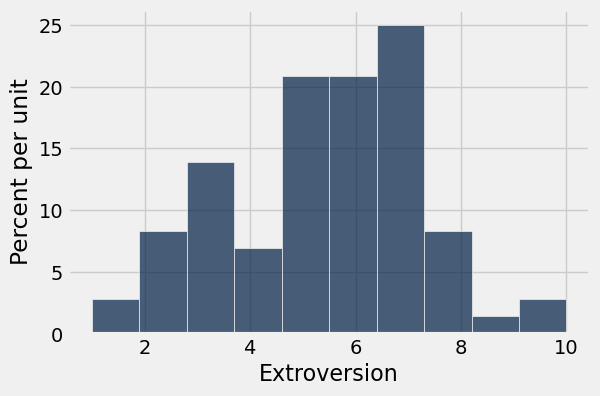

In [50]:
survey.hist('Extroversion')
# distribution of extroversion ratings from the class
# # we have some introverts (rated 1 on the scale)
# we have tons of ambiverts (around 5 rating)
# we have some extroverts (10 rating)

**Exercise:** Compute the *average* `"Texts"`, `"Hours of Sleep"`, `"Siblings"` for each value of `"Extroversion"`.  Save the resulting table as `by_extra`.

In [52]:
survey.labels

('Timestamp',
 'Year',
 'Extroversion',
 'Texts',
 'Handedness',
 'Sleep Position',
 'Hours of Sleep',
 'Siblings',
 'Pets',
 'Random Number',
 'Tattoos',
 'Commute')

In [56]:
survey.group('Tattoos')

Tattoos,count
No,65
Yes,15


In [67]:
by_extra = survey.group('Extroversion', np.average).select('Extroversion','Texts average', 'Hours of Sleep average', 'Siblings average')
by_extra

Extroversion,Texts average,Hours of Sleep average,Siblings average
1,14,6.5,0.5
2,69.8333,7.16667,1.66667
3,59.2,7.1,1.2
4,74,7,2.2
5,63,7.03333,1.93333
6,39.6667,7.26667,1.86667
7,65.1667,7.11111,2.27778
8,132.5,5.83333,1.66667
9,50,7,2
10,35,7,3


In [63]:
texts_nan = survey.column('Texts')
texts_no_nan = make_array(12.,  200.,   30.,   30.,   15.,   15.,  100.,   16.,  100.,
        100.,  350.,   50.,   10.,   10.,  100.,   30.,   35.,   15.,
         15.,  300.,   15.,   40.,  200.,   20.,  150.,  100.,   70.,
         20.,    2.,   20.,   50.,   50.,  100.,   60.,   50.,  150.,
         20.,   10.,   20.,   40.,  100.,  100.,   20.,  100.,   75.,
         30.,   75.,  100.,   60.,    2.,   50.,    2.,   30.,   15.,
         30.,   50.,   60.,  100.,   40.,  150.,    2.,   20.,   15.,
         35.,   50.,  300.,   0,    3.,  100.,  100.,  100.,    3.,
         50.,   45.,   45.,   60.,   40.,  100.,   10.,   50.)
survey = survey.with_column('Texts', texts_no_nan) # overwrite the original text column, replaced the nan with 0, and added it back to survey

# now when we take the average texts, for the 4 rating extroversion level, they have an average texts of 74
# previously it was nan

In [65]:
survey.group('Texts').show()

Texts,count
0,1
2,4
3,2
10,4
12,1
15,7
16,1
20,7
30,6
35,2


<details><summary>Click for Solution</summary>
    
```python
by_extra = (
    survey
    .select("Extraversion", "Number of textees", "Hours of sleep", "Piercings")
    .group('Extraversion', np.mean)
)
by_extra
```
    
</details>

Do you see any trends?  Let's plot the data to make it clearer.

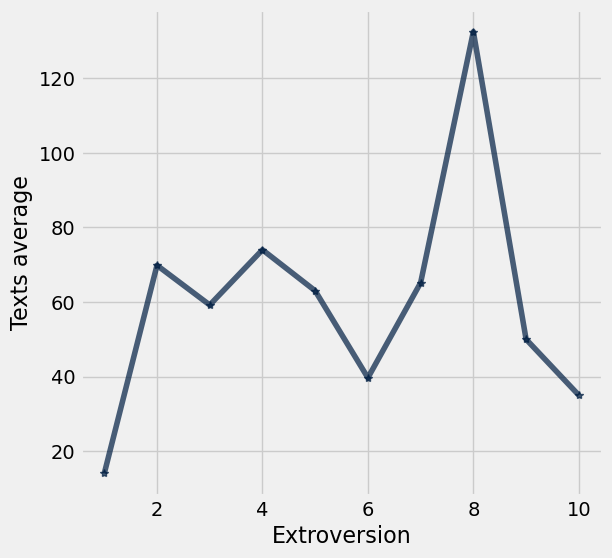

In [69]:
by_extra.plot("Extroversion", 'Texts average', marker="*")

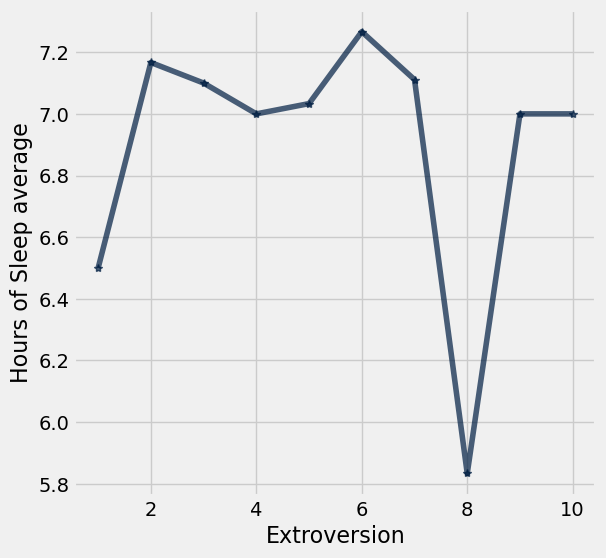

In [71]:
by_extra.plot("Extroversion", "Hours of Sleep average", marker="*")

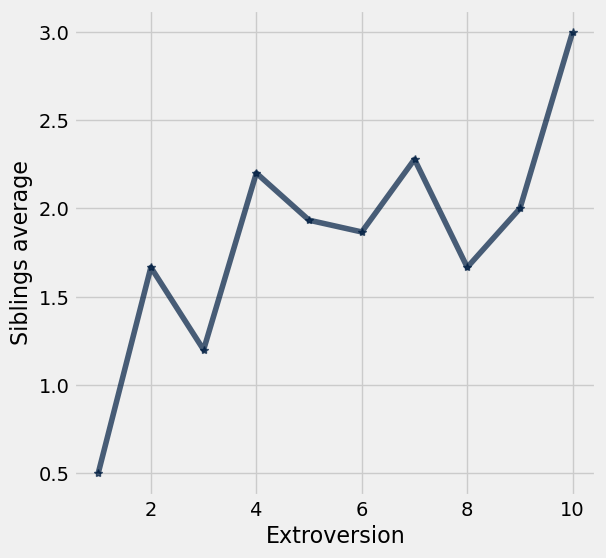

In [73]:
by_extra.plot("Extroversion", "Siblings average", marker="*")

---

<center> Return to Slides </center>

---

## Grouping by Two Columns 

Do right-handed people tend to sleep on their left side and left-handed people sleep on their right side? 

**Exercise:** Use the group function to count how many people are in each combination of `"Handedness"` and `"Sleep Position"`.

In [75]:
survey.group(['Handedness', 'Sleep Position']).show() # pass in a list as our first argument into group

Handedness,Sleep Position,count
Both,Stomach,1
Left,Back,2
Left,Left side,2
Left,Right side,1
Left,Stomach,1
Right,Back,18
Right,Left side,16
Right,Right side,28
Right,Stomach,9
nan,Back,1


In [83]:
survey.where('Handedness', are.not_equal_to('nan')).group(['Handedness', 'Sleep Position'])#.hist('Handedness')

Handedness,Sleep Position,count
Both,Stomach,1
Left,Back,2
Left,Left side,2
Left,Right side,1
Left,Stomach,1
Right,Back,18
Right,Left side,16
Right,Right side,28
Right,Stomach,9


<details><summary>Click for Solution</summary> 
    
```python
(
    survey
    .group(column_or_label=["Handedness", "Sleep position"])
    .show()
)
```
</details>

What combination of `"Handedness"` and `"Sleep position"` results in the most sleep on average?

**Exercise:** Use group to answer the above question.

In [86]:
handedness_sleep_position = survey.where('Handedness', are.not_equal_to('nan')).group(['Handedness', 'Sleep Position'])
handedness_sleep_position.sort('count', descending = True).row(0)

Row(Handedness='Right', Sleep Position='Right side', count=28)

<details><summary>Click for Solution</summary>
    
```python
(
    survey
    .select("Handedness", "Sleep position", "Hours of sleep")
    .group(['Handedness', 'Sleep position'], np.average)
    .show()
)
```
    
</details>

## Pivot Tables

When grouping by two columns it will sometimes be easier to re-arrange the table so the columns correspond to the *values* of one of the original grouped columns. 

Here is an example where I construct a pivot table that is equivalent to the above two column groupby operation:

```python
(
    survey
    .select("Handedness", "Sleep position", "Hours of sleep")
    .group(["Handedness", "Sleep position"], np.average)
    .show()
)
```

In [90]:
survey.select("Handedness", "Sleep Position", "Hours of Sleep").group(["Handedness", "Sleep Position"], np.average).where('Handedness', are.not_equal_to('nan'))

Handedness,Sleep Position,Hours of Sleep average
Both,Stomach,4
Left,Back,7.5
Left,Left side,8.5
Left,Right side,7
Left,Stomach,7
Right,Back,6.5
Right,Left side,7.4375
Right,Right side,6.83929
Right,Stomach,7.66667


Here I am rewriting the example by explicity naming the function arguments.  You wouldn't do this in practice but it helps to highlight the meaning of the four things we passed to the function above.

In [93]:
(
    survey.where('Handedness', are.not_equal_to('nan'))
    .pivot(
        columns = "Handedness", # The column whose unique values become columns
        rows    = "Sleep Position", # The column whose unique values become rows
        values  = "Hours of Sleep", # The column that will be used to compute the cells
        collect = np.average # How to aggregate the values 
    )
)

Sleep Position,Both,Left,Right
Back,0,7.5,6.5
Left side,0,8.5,7.4375
Right side,0,7,6.83929
Stomach,4,7,7.66667


Just as with the regular `group` function you will often want counts of combinations. In this case, you only need to specify the column to turn into columns and the column to turn into rows.

In [95]:
survey.where('Handedness', are.not_equal_to('nan')).pivot("Sleep Position", "Handedness")
# sleep position is my column headings: back, left, right, stomach
# handedness is my row headings: both, left right
# with pivot, if there are no existing combinations of the two categories, a 0 appears inside the pivot table

# notice with group, if there are no existing combination of the two categories, no row appears

# here we use 2 arguments with pivot
# by default, the stuff inside the pivot table, is a count of how many times this combination of two categories appears in our survey table

Handedness,Back,Left side,Right side,Stomach
Both,0,0,0,1
Left,2,2,1,1
Right,18,16,28,9


Pivots can be useful for visualizations:

/home/jovyan/.local/lib/python3.11/site-packages/datascience/tables.py:3647: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(tick_labels, stretch='ultra-condensed')


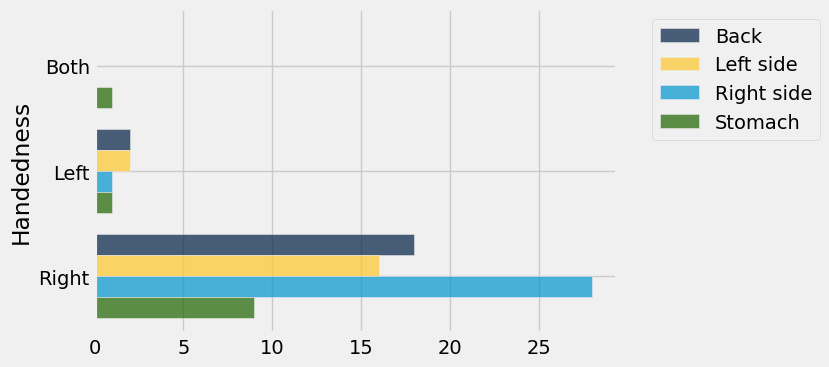

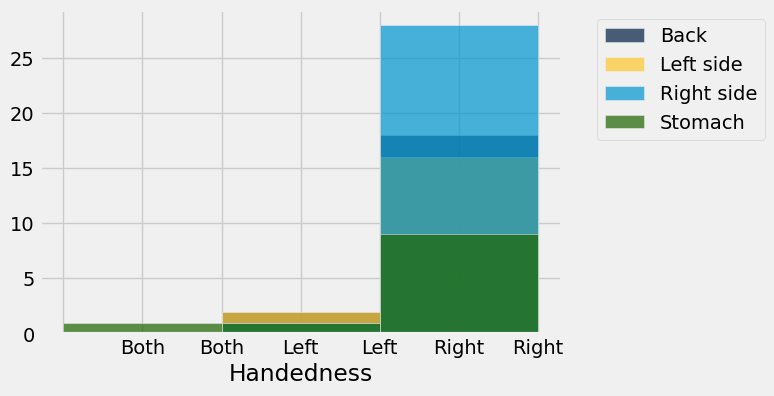

In [99]:
survey.where('Handedness', are.not_equal_to('nan')).pivot("Sleep Position", "Handedness").barh("Handedness")
# barh produces a horizontal bar chart
# notice our x-axis (handedness) is on the left side

survey.where('Handedness', are.not_equal_to('nan')).pivot("Sleep Position", "Handedness").bar("Handedness")


---

<center> Return to Slides </center>

---

## Joins

We use join to **join** two tables on a column.

In [100]:
drinks

Drink,Cafe,Price
Milk Tea,Asha,5.5
Espresso,Strada,1.75
Latte,Strada,3.25
Espresso,FSM,2


In [101]:
discounts = Table().with_columns(
    'Coupon % off', make_array(10, 25, 5),
    'Location', make_array('Asha', 'Strada', 'Asha')
)
discounts

Coupon % off,Location
10,Asha
25,Strada
5,Asha


**Exercise:** Combine the `drinks` and `discounts` table into a new table which has all possible discounts for each drink.

In [102]:
combined = drinks.join('Cafe', discounts, 'Location')
# join drinks and discounts table
# by matching elements that appear in 'Cafe' column and 'Location' column

# the table that is produced here in combined
# will display 'Cafe' as the new first column
# the column(s) that will be appended or added to the end of the table (right of the table)
# will be whatever else is inside the discounts table
# it just happens to be that there is one additional column to be added, and that's 'Coupon % off'

# notice, cafe FSM is not in combined--> this is because there was not available discount code for cafe FSM
# when we join tables, only the entries that match up in the columns we specify will appear
# entries that aren't in both table, in the column we specify will NOT appear

combined

Cafe,Drink,Price,Coupon % off
Asha,Milk Tea,5.5,10
Asha,Milk Tea,5.5,5
Strada,Espresso,1.75,25
Strada,Latte,3.25,25


<details><summary>Click for Solution</summary>
    
```python
combined = drinks.join(column_label='Cafe', other=discounts, other_label='Location')
combined
```
    
</details>

**Exercise:** Calculate the lowest rate you can get for each drink using the available coupons.

In [108]:
# two ways of finding new price
# (100% - coupon%)*old_price = (100-coupon%)/100 * old_price = new_price
# old_price - old_price * coupon% = old_price - old_price * (coupon%)/100 = new_price

old_price = combined.column('Price') # extracted Price column as array
coupon_perc = combined.column('Coupon % off') # extracted Coupon% column as array
coupon_prop = coupon_perc/100 # converted percentage to proportion (decimal) so we can multiply these numbers against price
coupon_prop
discount = old_price * coupon_prop # find the discount
new_price = old_price - discount # subtract discount from old price, to find new price
new_price
combined = combined.with_column('Discounted Price', new_price) # added new price back into combined column
combined

Cafe,Drink,Price,Coupon % off,Discounted Price
Asha,Milk Tea,5.5,10,4.95
Asha,Milk Tea,5.5,5,5.225
Strada,Espresso,1.75,25,1.3125
Strada,Latte,3.25,25,2.4375


<details><summary>Click for Solution</summary>
    
```python
combined = drinks.join('Cafe', discounts, 'Location') # from previous question

discount_frac = 1-combined.column("Coupon % off")/100.0

(
    combined
    .with_column("Discounted Price", combined.column("Price") * discount_frac)
    .select("Drink", "Discounted Price")
    .group("Drink", min)
)

```
</details>

**Exercise:** What happens if I run the following? How many rows will it produce.

In [110]:
drinks

Drink,Cafe,Price
Milk Tea,Asha,5.5
Espresso,Strada,1.75
Latte,Strada,3.25
Espresso,FSM,2


In [109]:
drinks.join('Cafe', drinks, 'Cafe')
# matches the entries in Cafe
# Cafe is now the first column from the first instance of drinks
# at the end of the table (right hand side of the table) is the remaining columns in the 2nd instance of drinks table

Cafe,Drink,Price,Drink_2,Price_2
Asha,Milk Tea,5.5,Milk Tea,5.5
FSM,Espresso,2,Espresso,2
Strada,Espresso,1.75,Espresso,1.75
Strada,Espresso,1.75,Latte,3.25
Strada,Latte,3.25,Espresso,1.75
Strada,Latte,3.25,Latte,3.25


---

<center> Return to Slides </center>

---

## Discussion Questions 

For the following practice questions we will use the sky scraper dataset

In [ ]:
# From the CORGIS Dataset Project
# By Austin Cory Bart acbart@vt.edu
# Version 2.0.0, created 3/22/2016
# https://corgis-edu.github.io/corgis/csv/skyscrapers/

this_year = 2023
sky = Table.read_table("data/skyscrapers_v2.csv")
sky = (
    sky
    .with_column("age", this_year - sky.column("completed"))
    .drop("completed")
)
sky

**Exercise:**  For each city, what’s the tallest building for each material?

In [ ]:
tall_pivot = 

<details><summary>Click for Solution</summary>
    
```python
tall_pivot = sky.pivot("material", "city", "height", max)
tall_pivot
```
</details>

In [ ]:
tall_pivot.barh("city")

**Exercise:** For each city that has at least 50 buildings in the dataset, compute the average height of buildings broken down by material.  Make a bar chart with the cities and the average height of buildings for each material.

<details><summary>Click for Solution</summary>
    
```python
num_buildings = sky.group("city")
(
    sky
    .join("city", num_buildings)
    .where("count", are.above_or_equal_to(50))
    .pivot("material", "city", "height", np.mean)
    .barh("city")
)
```
</details>

**Exercise:** Generate a table of the names and ages of the oldest buildings for each combination of city and materials.

<details><summary>Click for Solution</summary>
    
```python
def first(x):
    return x[0]
    
    
(
    sky
    .sort("age", descending=True) 
    .select("city", "material", "name", "age")
    .group(["city", "material"], first)
    #.where("city", "San Francisco") #<- for fun
)
```
    
</details>